In [ ]:
#IS-LM CURVE: Oct: 2017
import matplotlib.pyplot as plt
import numpy as np


print("The following questions are in regards to the IS Curve")
print("\n")
C1= float(input('What is C1?: '))
B = float(input('What is B?: ' ))
T = float(input('What is T?: ' ))
I1= float(input('What is I?: ' ))
D = float(input('What is D?: ' ))
G = float(input('What is G?: ' ))
Y = float(input('What is the co-efficent of Y: '))
print("\n")

def Consumption():
    CIG = (C1-(B*T)+I1+G)
    return CIG

def Consumption_2():
    CIG_2 = (Consumption()/(1 -B))
    return CIG_2

def Consumption_3():
    CIG_3 = D/ (1-B)
    return CIG_3



print("The follow questions are in regards to the LM Curve")
print("\n")

Msup = float(input("What is Money supply?: "))
Y2 = float(input("What is the co-efficent of Y?: "))
D2 = float(input("What is d [include sign]?: "))
print('\n')

A = np.matrix([[Y,Consumption_3()], [Y2,D2]])
B = np.matrix([[Consumption_2()],[Msup]])
answer = np.linalg.solve(A,B)
xval = (answer[0])
yval = (answer[1])

print("Output = ",xval)
print("Interest Rate = ", yval,"%")



x2a = [1240,xval,1260]
y2a = [7.6,yval,7.4]

x1a =[1240,xval,1260] 
y1a =[7.4,yval,7.6] 



plt.plot(x2a, y2a,'-')
plt.plot(x1a,y1a, '--')
plt.plot([1250], [7.5], marker='o', markersize=8, color="red")
plt.title("IS-LM Curve")
plt.show()


In [ ]:
#@title Parameters
series_Length = 70  #@param {type: "slider", min: 0, max: 100}
Savings = 0.4  #@param {type: "slider", min: 0, max: 1, step:0.01}
Productivity_Parameter =0.68 #@param {type:"slider", min:0, max:1, step:0.01}
Depreciation = .1 #@param {type:"number", min:0, max: 1.0}
#@markdown ---



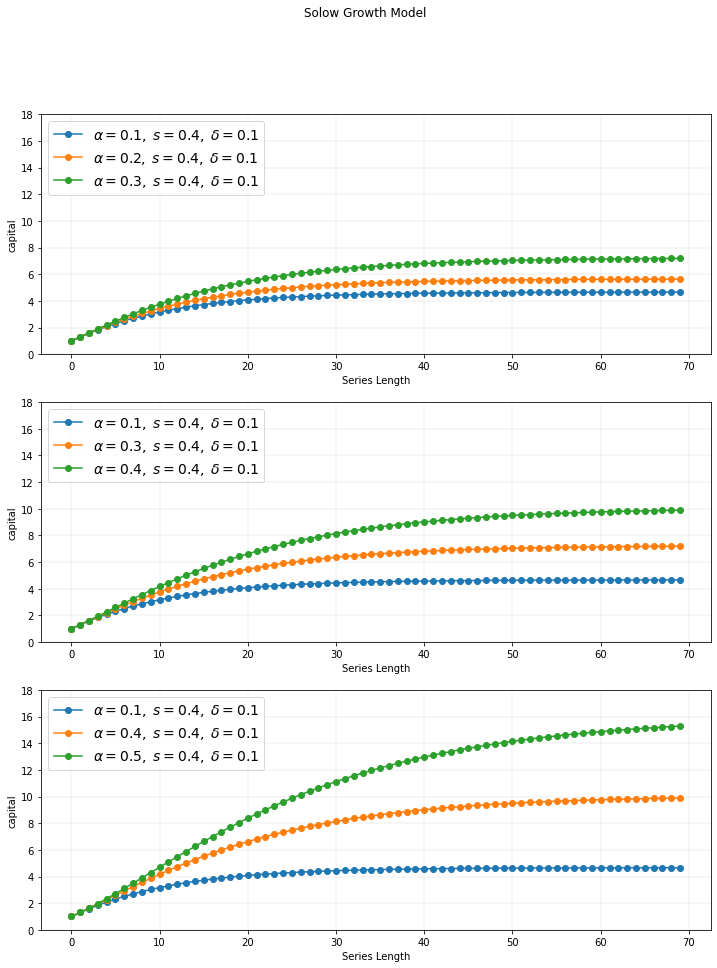

In [ ]:
#March 2018
import numpy as np
import matplotlib.pyplot as plt
from itertools import product

def plot_path(ax, asa, s_vals, ds, series_length= series_Length):
    """
       K[t]= capital with respect to time
       s = savings
       a = productivity parameter
       d = depreciation
    """
    
    plt.suptitle("Solow Growth Model")
    k = np.empty(series_length)


    for (a, s, d) in product(asa, s_vals, ds):
        k[0] = 1
        
        for t in range(series_length-1):
            k[t+1] = s * k[t]**a + (1 - d) * k[t]
        ax.plot(k, 'o-', label=rf"$\alpha = {a},\; s = {s},\; \delta = {d}$")
    
    ax.grid(lw=0.2)
    ax.set_xlabel('Series Length')
    ax.set_ylabel('capital')
    ax.set_ylim(0, 18)
    ax.legend(loc='upper left', frameon=True, fontsize=14)

fig, axes = plt.subplots(3, 1, figsize=(12, 15))

# Parameters (as, s_vals, δs)
set_one = ([0.10, 0.20, 0.30], [Savings], [Depreciation])
set_two = ([0.10, 0.30, 0.40], [Savings], [Depreciation])
set_three = ([0.10, 0.40, 0.50], [Savings], [Depreciation])


for (ax, params) in zip(axes, (set_one, set_two, set_three)):
    asa, s_vals, ds = params
    plot_path(ax, asa, s_vals, ds)

plt.show()